In [1]:
import pandas as pd
import numpy as np
import altair as alt
df = pd.read_csv("StudyEventTimeSeries.csv")

In [2]:
codelist = list(set(df.as_matrix().flatten()))
codelist.remove(np.nan)

actionOnly= list(filter(lambda x: x.isupper(),codelist))
featureOnly= list(filter(lambda x: x.islower(),codelist))

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
# df["t"]=df.index

In [4]:
df = df.stack().reset_index()

df = df.rename(columns={
    "level_0":"t",
    "level_1":"user",
    0:"action"
})

In [5]:
df_break = df[df.action.isin(["BR"])]
break_chart = alt.Chart(df_break).mark_tick(thickness=2,color="black").encode(        
    y="user",
    x='t'
)

In [6]:
component_dict = {
     'pattern-upload':'Pattern Specification',
     'sketch-to-modify':'Pattern Specification',
     'drag-and-drop':'Result Querying',
     'change-metric':'Match Specification',
     'filter':'Slice-and-Dice',
     'brush-xrange':'Match Specification',
     'min-similarity-cutoff':'Match Specification',
     'smoothing':'Match Specification',
     'ignore-xrange':'Match Specification',
     'representative-outlier':'Recommendation',
     'dynamic-class':'Slice-and-Dice',
     'sketch-to-query':'Pattern Specification',
     'reverse-y':'View Specification',
     'input-equation':'Pattern Specification',
     'upload-dataset':'Pattern Specification',
     'show-scatter':'View Specification',
     'export':'others',
     'change-number-of-results':'Match Specification',
     'control-kmeans-clustersize':'Recommendation',
     'change-axis':'View Specification'
}

In [7]:
df_feature = df[df.action.isin(featureOnly)]
#Remove Export
df_feature = df_feature[df_feature["action"]!="export"]
df_feature["Feature"] = df_feature["action"]
df_component = df_feature
df_component["action"] = df_feature["action"].replace(component_dict)
df_component= df_component.rename(index=str,columns={"action":"component"})

In [8]:
# df_component = df_component[df_component["component"]!="control"] #remove control in list of components

In [9]:
component_chart = alt.Chart(df_component).mark_circle(opacity=1).encode(        
    color=alt.Color('component',title="Component"),
    y="user",
    x='t'
)

In [10]:
sum_events = df.groupby("user").count().reset_index()[["user","t"]]

In [11]:
sum_events["t"] = sum_events["t"]-1

In [12]:
guide = alt.Chart(sum_events).mark_bar(color="gray",opacity=0.25,size=3).encode(        
    y="user",
    x=alt.X('t',aggregate="sum",title="Timepoint")
)

In [13]:
df_insight = df[df.action.isin(["IS","ID"])]
df_insight.loc[df_insight["action"]=="ID","action"]="data insight"
df_insight.loc[df_insight["action"]=="IS","action"]="scientific insight"
insight_chart = alt.Chart(df_insight).mark_point(shape="diamond",color="red").encode(        
    alt.Y("user",title="Participant"),
    alt.X("t",title="Timepoint"),
    shape='action' #make no distinction between data and science insights
)

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


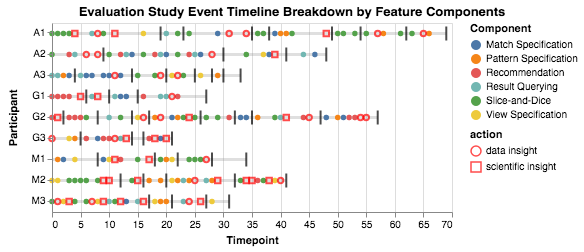

In [14]:
chart = guide+component_chart+ break_chart + insight_chart
chart.title="Evaluation Study Event Timeline Breakdown by Feature Components"
chart

- Astronomers discovered insights more about their data, whereas geneticists and material scientists uncovered more scientific insights.
- The use of exact specification (including sketch) is rare, and doesn't usually lead to useful outcomes. 

# Processes

In [15]:
td = 'top-down-querying'
sc = 'search-with-context'
bu = 'bottom-up-querying'
rec= 'recommendation'
component_to_process = {
    'Pattern Specification':td,
    'Match Specification':td,
    'View Specification':sc, 
    'Slice-and-Dice':sc,
    'Result Querying':bu,
    'Recommendation':bu
}

In [16]:
df_process = df_component
df_process["Process"] = df_component["component"].replace(component_to_process)

In [17]:
process_chart = alt.Chart(df_component).mark_circle().encode(        
    alt.Color("Process",sort=[td,sc,bu,rec]),
    y="user",
    x='t'
)

In [18]:
df_break = df[df.action.isin(["BR"])]
break_chart = alt.Chart(df_break).mark_tick(thickness=2,color="black").encode(        
    y="user",
    x='t'
)

In [19]:
df_insight = df[df.action.isin(["IS","ID"])]
df_insight.loc[df_insight["action"]=="ID","Action"]="data insight"
df_insight.loc[df_insight["action"]=="IS","Action"]="scientific insight"
insight_chart = alt.Chart(df_insight).mark_point(shape="diamond",color="red").encode(        
    alt.Y("user",title="Participant"),
    alt.X("t",title="Timepoint"),
    shape='Action' #make no distinction between data and science insights
)


/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


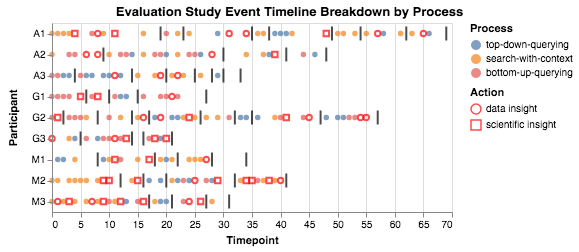

In [20]:
chart = process_chart+ break_chart + insight_chart
chart.title="Evaluation Study Event Timeline Breakdown by Process"
chart

- Top-down querying alone does not lead to insights. We see a lot of sessions where people try top-down querying then give up without discovering an insight. Even when there is top-down querying performed sucessfully, it is often because it was associated with a search with context, or used for sketch modification on a drag-and-dropped visualization.

# Statistics

In [21]:
print ("Total number of sessions:", len(df[df["action"]=="BR"]))

Total number of sessions: 50


In [22]:
df['subject'] = df['user'].apply(lambda x: {'A':'astro', 'G':'genetics', 'M':'material science'}[x[0]])

In [23]:
df[df["action"]=="BR"].groupby("subject").count().reset_index()[["subject","t"]].rename(columns={"t":"Number of Sessions"}).transpose()

,0,1,2
subject,astro,genetics,material science
Number of Sessions,19,17,14


In [24]:
df = df_feature

In [25]:
df['subject'] = df['user'].apply(lambda x: {'A':'astro', 'G':'genetics', 'M':'material science'}[x[0]])

In [26]:
df_frequency_by_subject_feature = df.groupby(["subject","Feature"]).count()["t"].reset_index().rename(columns={"t":"Usage Frequency"})

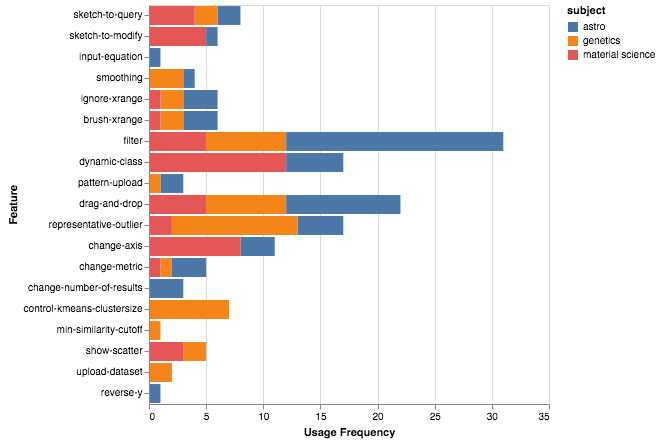

In [27]:
alt.Chart(df_frequency_by_subject_feature).mark_bar().encode(
    alt.X("Usage Frequency"),
    alt.Y("Feature",sort= ['sketch-to-query','sketch-to-modify','input-equation','smoothing','ignore-xrange','brush-xrange',
                          'filter','dynamic-class','pattern-upload','drag-and-drop','representative-outlier',
                          'change-axis', 'change-metric','change-number-of-results','control-kmeans-clustersize', 'min-similarity-cutoff','show-scatter', 'upload-dataset','reverse-y']),
    color = "subject"
)

In [28]:
df_component = df
df_component["Component"] = df["Feature"].replace(component_dict)

df_frequency_by_subject_feature = df.groupby(["subject","Component"]).count()["t"].reset_index().rename(columns={"t":"Usage Frequency"})

# df_frequency_by_subject_feature = df_frequency_by_subject_feature[df_frequency_by_subject_feature["Component"]!="control"]

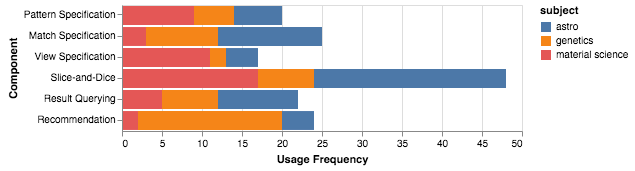

In [29]:
alt.Chart(df_frequency_by_subject_feature).mark_bar().encode(
    alt.X("Usage Frequency"),
    alt.Y("Component",sort=['Pattern Specification','Match Specification','View Specification','Slice-and-Dice','Result Querying','Recommendation']),
    color = "subject"
)

In [30]:
df_process = df_component
df_process["Process"] = df_component["Component"].replace(component_to_process)

In [31]:
df_frequency_by_subject_feature = df.groupby(["subject","Process"]).count()["t"].reset_index().rename(columns={"t":"Usage Frequency"})

In [32]:
df_frequency_by_subject_feature = df_frequency_by_subject_feature[df_frequency_by_subject_feature["Process"]!="others"]

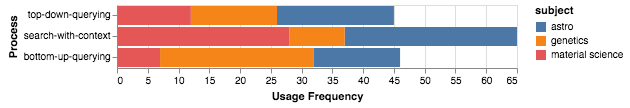

In [34]:
alt.Chart(df_frequency_by_subject_feature).mark_bar().encode(
    alt.X("Usage Frequency"),
    alt.Y("Process",sort=[td,sc,bu,rec]),
    alt.Color("subject")
)

Most of the contribution of top-down querying is coming from changing metric, brush x-range, ignore-xrange, not just the sketching portion. 

In [42]:
df_process[df_process["Process"]=="top-down-querying"].groupby("Feature").count().rename(columns={"t":"Usage Frequency"}).reset_index()[["Feature","Usage Frequency"]].transpose()

,0,1,2,3,4,5,6,7,8,9,10
Feature,brush-xrange,change-metric,change-number-of-results,ignore-xrange,input-equation,min-similarity-cutoff,pattern-upload,sketch-to-modify,sketch-to-query,smoothing,upload-dataset
Usage Frequency,6,5,3,6,1,1,3,6,8,4,2


### Top k feature for each subject 

In [43]:
df_frequency_by_subject_feature = df.groupby(["subject","Feature"]).count()["t"].reset_index().rename(columns={"t":"Usage Frequency"})

In [44]:
df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="astro"].nlargest(5,"Usage Frequency")

,subject,Feature,Usage Frequency
6,astro,filter,19
4,astro,drag-and-drop,10
5,astro,dynamic-class,5
10,astro,representative-outlier,4
0,astro,brush-xrange,3


In [45]:
df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="material science"].nlargest(5,"Usage Frequency")

,subject,Feature,Usage Frequency
32,material science,dynamic-class,12
29,material science,change-axis,8
31,material science,drag-and-drop,5
33,material science,filter,5
37,material science,sketch-to-modify,5


In [46]:
df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="genetics"].nlargest(5,"Usage Frequency")

,subject,Feature,Usage Frequency
23,genetics,representative-outlier,11
17,genetics,control-kmeans-clustersize,7
18,genetics,drag-and-drop,7
19,genetics,filter,7
26,genetics,smoothing,3


### Feature usage scaled by individual subject area 

In [47]:
astro_sum = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="astro"]["Usage Frequency"].sum()
genetics_sum = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="genetics"]["Usage Frequency"].sum()
matsci_sum = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="material science"]["Usage Frequency"].sum()

In [48]:
df_frequency_by_subject_feature.loc[df_frequency_by_subject_feature["subject"]=="astro","Normalized Frequency"] = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="astro"]["Usage Frequency"]/astro_sum*100
df_frequency_by_subject_feature.loc[df_frequency_by_subject_feature["subject"]=="genetics","Normalized Frequency"] = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="genetics"]["Usage Frequency"]/genetics_sum*100
df_frequency_by_subject_feature.loc[df_frequency_by_subject_feature["subject"]=="material science","Normalized Frequency"] = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="material science"]["Usage Frequency"]/matsci_sum*100

In [49]:
fdf = df_frequency_by_subject_feature[["subject","Feature","Normalized Frequency"]]
fdf = fdf[fdf["Normalized Frequency"]>=5]

In [50]:
fdf["Normalized Frequency"] = fdf["Normalized Frequency"].map("{:.2f}".format)

In [51]:
fdf

,subject,Feature,Normalized Frequency
4,astro,drag-and-drop,16.39
5,astro,dynamic-class,8.20
6,astro,filter,31.15
10,astro,representative-outlier,6.56
17,genetics,control-kmeans-clustersize,14.58
18,genetics,drag-and-drop,14.58
19,genetics,filter,14.58
23,genetics,representative-outlier,22.92
26,genetics,smoothing,6.25
29,material science,change-axis,17.02


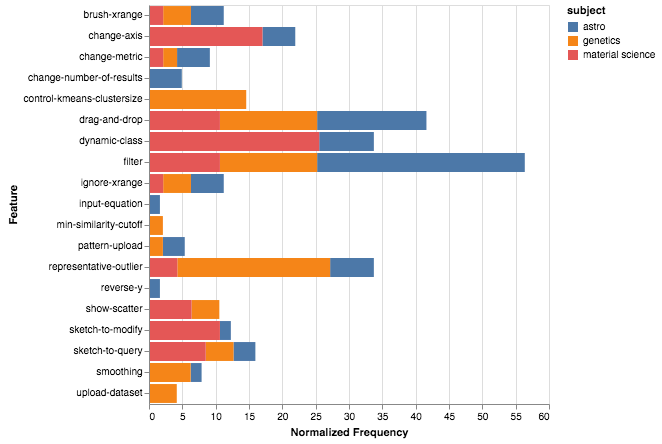

In [52]:
alt.Chart(df_frequency_by_subject_feature).mark_bar().encode(
    x= "Normalized Frequency",
    y= "Feature",
    color="subject"
)

In [53]:
#df_frequency_by_subject_feature["Component"] = df_feature["Feature"].replace(component_dict)

In [54]:
df_frequency_by_subject_feature = df.groupby(["subject","Component"]).sum().reset_index().rename(columns={"t":"Usage Frequency"})
astro_sum = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="astro"]["Usage Frequency"].sum()
genetics_sum = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="genetics"]["Usage Frequency"].sum()
matsci_sum = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="material science"]["Usage Frequency"].sum()
df_frequency_by_subject_feature.loc[df_frequency_by_subject_feature["subject"]=="astro","Normalized Frequency"] = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="astro"]["Usage Frequency"]/astro_sum*100
df_frequency_by_subject_feature.loc[df_frequency_by_subject_feature["subject"]=="genetics","Normalized Frequency"] = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="genetics"]["Usage Frequency"]/genetics_sum*100
df_frequency_by_subject_feature.loc[df_frequency_by_subject_feature["subject"]=="material science","Normalized Frequency"] = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]=="material science"]["Usage Frequency"]/matsci_sum*100

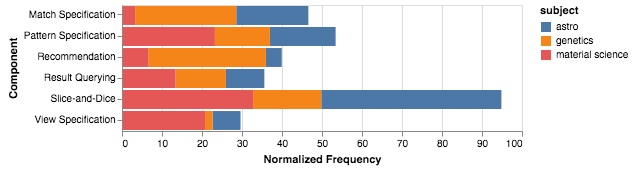

In [55]:
alt.Chart(df_frequency_by_subject_feature).mark_bar().encode(
    x= alt.X("Normalized Frequency"),
    y= alt.Y("Component",sort=['exact-specification','approx-shape-specification','range-selection','flexible-matching',
                            'filter-selection','group-comparison',
                            'concept-query', 'result-querying','recommendation','control']),
    color="subject"
)